In [1]:
import pandas as pd

df = pd.read_csv('./draft_results.csv')

df

,Round,Best QB,Best RB,Best WR,Best TE,Num QB,Num RB,Num WR,Num TE,Action
0,1,21,7,6,22,0,0,0,0,1
1,2,21,16,15,22,0,1,0,0,3
2,3,47,26,28,29,0,1,0,1,3
3,4,47,37,35,36,0,1,0,2,2
4,5,47,48,50,46,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...
15995,12,114,123,113,120,2,4,2,3,2
15996,13,144,125,129,149,2,4,3,3,1
15997,14,160,148,129,151,2,5,3,3,2
15998,15,166,153,131,170,2,5,4,3,2


In [2]:
df['QB Selected'] = (df['Action'] == 0).astype(int)
df['RB Selected'] = (df['Action'] == 1).astype(int)
df['WR Selected'] = (df['Action'] == 2).astype(int)
df['TE Selected'] = (df['Action'] == 3).astype(int)

df

,Round,Best QB,Best RB,Best WR,Best TE,Num QB,Num RB,Num WR,Num TE,Action,QB Selected,RB Selected,WR Selected,TE Selected
0,1,21,7,6,22,0,0,0,0,1,0,1,0,0
1,2,21,16,15,22,0,1,0,0,3,0,0,0,1
2,3,47,26,28,29,0,1,0,1,3,0,0,0,1
3,4,47,37,35,36,0,1,0,2,2,0,0,1,0
4,5,47,48,50,46,0,1,1,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,12,114,123,113,120,2,4,2,3,2,0,0,1,0
15996,13,144,125,129,149,2,4,3,3,1,0,1,0,0
15997,14,160,148,129,151,2,5,3,3,2,0,0,1,0
15998,15,166,153,131,170,2,5,4,3,2,0,0,1,0


In [3]:
df[[
    'Num QB After', 'Num RB After', 'Num WR After', 'Num TE After'
]] = df[[
    'Num QB', 'Num RB', 'Num WR', 'Num TE'
]].to_numpy() + df[[
    'QB Selected', 'RB Selected', 'WR Selected', 'TE Selected'
]].to_numpy()

df

,Round,Best QB,Best RB,Best WR,Best TE,Num QB,Num RB,Num WR,Num TE,Action,QB Selected,RB Selected,WR Selected,TE Selected,Num QB After,Num RB After,Num WR After,Num TE After
0,1,21,7,6,22,0,0,0,0,1,0,1,0,0,0,1,0,0
1,2,21,16,15,22,0,1,0,0,3,0,0,0,1,0,1,0,1
2,3,47,26,28,29,0,1,0,1,3,0,0,0,1,0,1,0,2
3,4,47,37,35,36,0,1,0,2,2,0,0,1,0,0,1,1,2
4,5,47,48,50,46,0,1,1,2,0,1,0,0,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,12,114,123,113,120,2,4,2,3,2,0,0,1,0,2,4,3,3
15996,13,144,125,129,149,2,4,3,3,1,0,1,0,0,2,5,3,3
15997,14,160,148,129,151,2,5,3,3,2,0,0,1,0,2,5,4,3
15998,15,166,153,131,170,2,5,4,3,2,0,0,1,0,2,5,5,3


In [4]:
df_qbs = df.pivot_table(values='QB Selected', index='Num QB', columns='Round', aggfunc='mean')

df_qbs

Round,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Num QB,,,,,,,,,,,,,,,,
0,0.0,0.0,0.1,0.295556,0.578864,0.310861,0.021739,0.033333,0.425287,0.730000,0.888889,1.000000,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.000000,0.008197,0.020548,0.018797,0.038119,0.335518,0.641997,0.790036,0.807229,0.421053,0.000000,0.000000,0.000000
2,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.030303,0.064516,0.181529,0.211111,0.310153,0.222025,0.087444,0.036855,0.025510
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.005525,0.022453,0.046472
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.312500


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


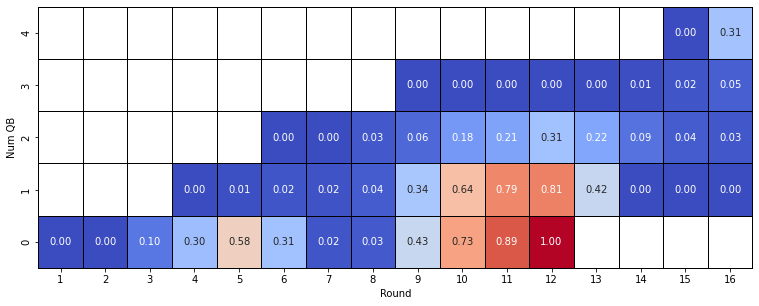

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12.8, 4.8))

sns.heatmap(
    df_qbs, annot=True, fmt='.2f', cmap='coolwarm', cbar=False, 
    linewidths=1, linecolor='black', clip_on=False
)

plt.gca().invert_yaxis()

plt.show()

In [6]:
df_rbs = df.pivot_table(values='RB Selected', index='Num RB', columns='Round', aggfunc='mean')

df_rbs

Round,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Num RB,,,,,,,,,,,,,,,,
0,0.926,0.324324,0.480000,0.692308,0.500000,0.500000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.167387,0.184906,0.285714,0.156627,0.363208,0.437500,0.503226,0.701299,0.652174,0.750000,0.500000,1.000000,NaN,NaN,NaN
2,NaN,NaN,0.064516,0.085616,0.067538,0.201581,0.363799,0.546414,0.617747,0.373494,0.369748,0.345679,0.222222,0.209302,0.088235,0.129032
3,NaN,NaN,NaN,0.100000,0.029412,0.171875,0.419355,0.610922,0.506702,0.273973,0.140673,0.144615,0.166667,0.217228,0.169725,0.211957
4,NaN,NaN,NaN,NaN,0.000000,0.000000,0.769231,0.588235,0.386473,0.126582,0.045213,0.061728,0.135831,0.147619,0.132212,0.233668
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.900000,0.317073,0.148148,0.007576,0.020270,0.123529,0.202899,0.185022,0.295833
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.555556,0.058824,0.031250,0.031250,0.029412,0.277778,0.172840,0.385321
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.125000,0.375000,0.550000,0.347826
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.666667,0.583333


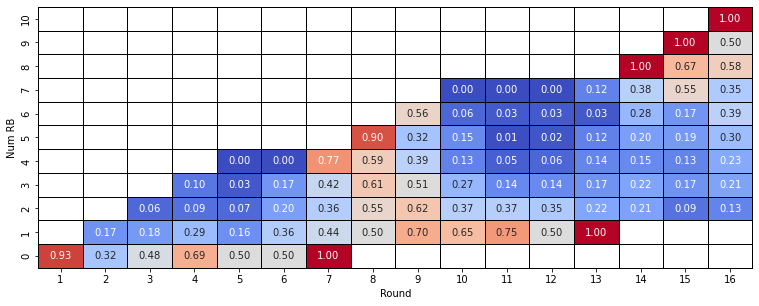

In [7]:
plt.figure(figsize=(12.8, 4.8))

sns.heatmap(
    df_rbs, annot=True, fmt='.2f', cmap='coolwarm', cbar=False, 
    linewidths=1, linecolor='black', clip_on=False
)

plt.gca().invert_yaxis()

plt.show()

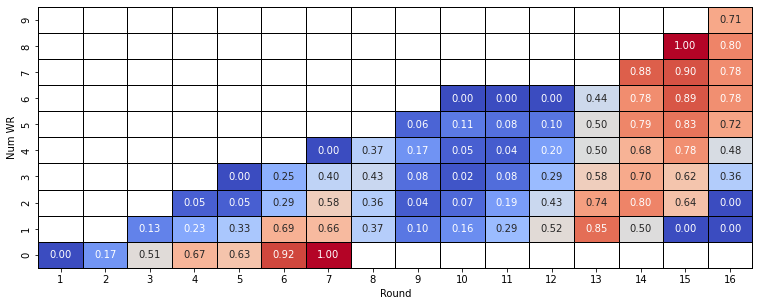

In [8]:
df_wrs = df.pivot_table(values='WR Selected', index='Num WR', columns='Round', aggfunc='mean')

plt.figure(figsize=(12.8, 4.8))

sns.heatmap(
    df_wrs, annot=True, fmt='.2f', cmap='coolwarm', cbar=False, 
    linewidths=1, linecolor='black', clip_on=False
)

plt.gca().invert_yaxis()

plt.show()

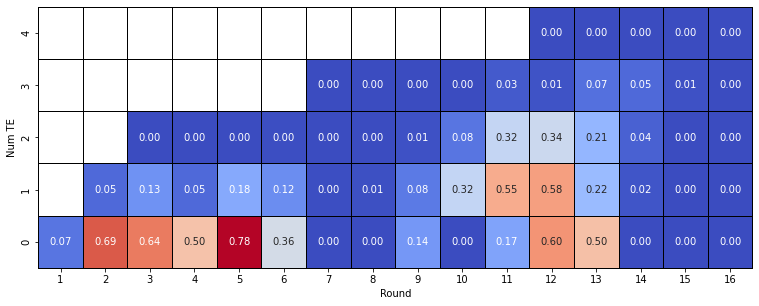

In [9]:
df_tes = df.pivot_table(values='TE Selected', index='Num TE', columns='Round', aggfunc='mean')

plt.figure(figsize=(12.8, 4.8))

sns.heatmap(
    df_tes, annot=True, fmt='.2f', cmap='coolwarm', cbar=False, 
    linewidths=1, linecolor='black', clip_on=False
)

plt.gca().invert_yaxis()

plt.show()

In [10]:
df_groupby_round = df.groupby(['Round'])[['Num QB After', 'Num RB After', 'Num WR After', 'Num TE After']].mean().reset_index()

df_groupby_round

,Round,Num QB After,Num RB After,Num WR After,Num TE After
0,1,0.000,0.926,0.000,0.074
1,2,0.000,1.105,0.174,0.721
2,3,0.100,1.286,0.619,0.995
3,4,0.366,1.522,1.024,1.088
4,5,0.736,1.636,1.352,1.276
5,6,0.834,1.905,1.894,1.367
6,7,0.853,2.304,2.473,1.370
7,8,0.890,2.869,2.866,1.375
8,9,1.224,3.391,2.954,1.431
9,10,1.727,3.625,3.005,1.643


In [11]:
df_groupby_round = pd.concat(
    [df_groupby_round, 
    pd.DataFrame([[0 for _ in range(df_groupby_round.shape[1])]], columns=df_groupby_round.columns)]
)

df_groupby_round

,Round,Num QB After,Num RB After,Num WR After,Num TE After
0,1,0.000,0.926,0.000,0.074
1,2,0.000,1.105,0.174,0.721
2,3,0.100,1.286,0.619,0.995
3,4,0.366,1.522,1.024,1.088
4,5,0.736,1.636,1.352,1.276
5,6,0.834,1.905,1.894,1.367
6,7,0.853,2.304,2.473,1.370
7,8,0.890,2.869,2.866,1.375
8,9,1.224,3.391,2.954,1.431
9,10,1.727,3.625,3.005,1.643


In [12]:
df_melted_round = df_groupby_round.melt(id_vars=['Round'], var_name='Position', value_name='Average Amount Rostered')

df_melted_round['Position'] = df_melted_round['Position'].str[4:6]

df_melted_round

,Round,Position,Average Amount Rostered
0,1,QB,0.000
1,2,QB,0.000
2,3,QB,0.100
3,4,QB,0.366
4,5,QB,0.736
...,...,...,...
63,13,TE,2.503
64,14,TE,2.547
65,15,TE,2.553
66,16,TE,2.554


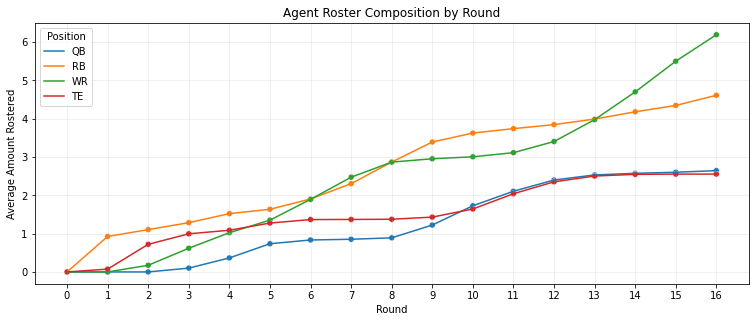

In [13]:
plt.figure(figsize=(12.8, 4.8))

plt.title('Agent Roster Composition by Round')

sns.lineplot(data=df_melted_round, x='Round', y='Average Amount Rostered', hue='Position')
sns.scatterplot(data=df_melted_round, x='Round', y='Average Amount Rostered', hue='Position', legend=None)

plt.grid(alpha=0.25)

plt.xticks([i for i in range(17)])

plt.show()

In [25]:
df

,Round,Best QB,Best RB,Best WR,Best TE,Num QB,Num RB,Num WR,Num TE,Action,QB Selected,RB Selected,WR Selected,TE Selected,Num QB After,Num RB After,Num WR After,Num TE After
0,1,21,7,6,22,0,0,0,0,1,0,1,0,0,0,1,0,0
1,2,21,16,15,22,0,1,0,0,3,0,0,0,1,0,1,0,1
2,3,47,26,28,29,0,1,0,1,3,0,0,0,1,0,1,0,2
3,4,47,37,35,36,0,1,0,2,2,0,0,1,0,0,1,1,2
4,5,47,48,50,46,0,1,1,2,0,1,0,0,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,12,114,123,113,120,2,4,2,3,2,0,0,1,0,2,4,3,3
15996,13,144,125,129,149,2,4,3,3,1,0,1,0,0,2,5,3,3
15997,14,160,148,129,151,2,5,3,3,2,0,0,1,0,2,5,4,3
15998,15,166,153,131,170,2,5,4,3,2,0,0,1,0,2,5,5,3


In [30]:
df_melted = df[[
    'Round', 'Num QB After', 'Num RB After', 'Num WR After', 'Num TE After'
]].melt(id_vars=['Round'], var_name='Position', value_name='Amount Rostered')

df_melted['Position'] = df_melted['Position'].str[4:6]

df_melted

,Round,Position,Amount Rostered
0,1,QB,0
1,2,QB,0
2,3,QB,0
3,4,QB,0
4,5,QB,1
...,...,...,...
63995,12,TE,3
63996,13,TE,3
63997,14,TE,3
63998,15,TE,3


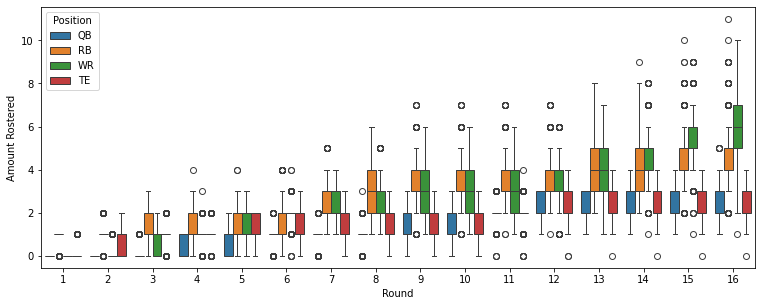

In [33]:
plt.figure(figsize=(12.8, 4.8))

sns.boxplot(data=df_melted, x='Round', y='Amount Rostered', hue='Position')

plt.show()

In [34]:
df_groupby_round = df.groupby(['Round'])[['QB Selected', 'RB Selected', 'WR Selected', 'TE Selected']].mean().reset_index()

df_melted_round = df_groupby_round.melt(id_vars=['Round'], var_name='Position', value_name='Selection Frequency')

df_melted_round['Position'] = df_melted_round['Position'].str[:2]

df_melted_round

,Round,Position,Selection Frequency
0,1,QB,0.000
1,2,QB,0.000
2,3,QB,0.100
3,4,QB,0.266
4,5,QB,0.370
...,...,...,...
59,12,TE,0.311
60,13,TE,0.151
61,14,TE,0.044
62,15,TE,0.006


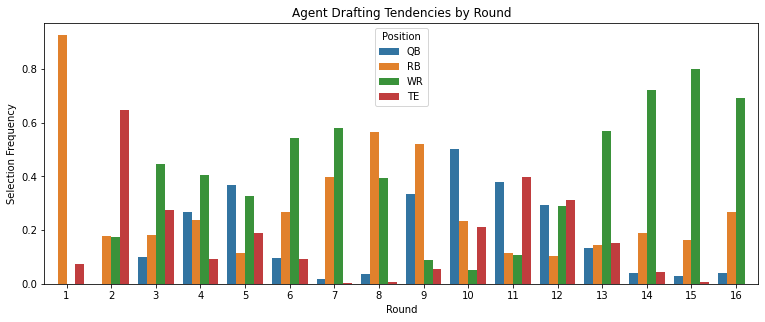

In [35]:
plt.figure(figsize=(12.8, 4.8))

plt.title('Agent Drafting Tendencies by Round')

sns.barplot(data=df_melted_round, x='Round', y='Selection Frequency', hue='Position')

plt.show()

In [36]:
import numpy as np

best_position_available = np.argmin(df[['Best QB', 'Best RB', 'Best WR', 'Best TE']].to_numpy(), axis=1)

df['Best Available Taken'] = (best_position_available == df['Action']).astype(int)

df

,Round,Best QB,Best RB,Best WR,Best TE,Num QB,Num RB,Num WR,Num TE,Action,QB Selected,RB Selected,WR Selected,TE Selected,Num QB After,Num RB After,Num WR After,Num TE After,Best Available Taken
0,1,21,7,6,22,0,0,0,0,1,0,1,0,0,0,1,0,0,0
1,2,21,16,15,22,0,1,0,0,3,0,0,0,1,0,1,0,1,0
2,3,47,26,28,29,0,1,0,1,3,0,0,0,1,0,1,0,2,0
3,4,47,37,35,36,0,1,0,2,2,0,0,1,0,0,1,1,2,1
4,5,47,48,50,46,0,1,1,2,0,1,0,0,0,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,12,114,123,113,120,2,4,2,3,2,0,0,1,0,2,4,3,3,1
15996,13,144,125,129,149,2,4,3,3,1,0,1,0,0,2,5,3,3,1
15997,14,160,148,129,151,2,5,3,3,2,0,0,1,0,2,5,4,3,1
15998,15,166,153,131,170,2,5,4,3,2,0,0,1,0,2,5,5,3,1


In [37]:
df_best = df.groupby(['Round'])['Best Available Taken'].mean().reset_index()

df_best

,Round,Best Available Taken
0,1,0.621
1,2,0.270
2,3,0.459
3,4,0.426
4,5,0.367
5,6,0.564
6,7,0.610
7,8,0.525
8,9,0.339
9,10,0.197


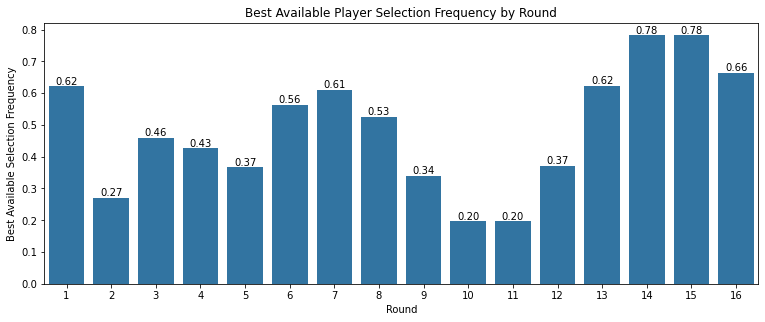

In [51]:
plt.figure(figsize=(12.8, 4.8))

plt.title('Best Available Player Selection Frequency by Round')

ax = sns.barplot(data=df_best, x='Round', y='Best Available Taken')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), 
            f'{p.get_height():.2f}', ha='center', va='bottom')

plt.ylabel('Best Available Selection Frequency')

plt.show()